In [1]:
#Exercice 1
import pandas as pd
data = pd.read_csv("heart.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Separate features and target variable
X = data.drop('target', axis=1)
y = data['target']

# Split the data into training and testing sets (80% for training, 20% for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create KNN model with k=3
knn = KNeighborsClassifier(n_neighbors=3)

# Train the model
knn.fit(X_train, y_train)

# Predict on the test set
y_pred = knn.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of KNN model with k=3 : {accuracy:.2f}")

Accuracy of KNN model with k=3 : 0.66


In [4]:
from sklearn.metrics import f1_score, confusion_matrix

# Calculate F1-score
f1 = f1_score(y_test, y_pred)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate precision, recall, and F1-score from confusion matrix
precision = cm[1, 1] / (cm[1, 1] + cm[0, 1])
recall = cm[1, 1] / (cm[1, 1] + cm[1, 0])
f1_manual = 2 * (precision * recall) / (precision + recall)

# Print F1-score
print(f"F1-Score (Sklearn): {f1:.4f}")
print(f"F1-Score (Manual): {f1_manual:.4f}")



F1-Score (Sklearn): 0.6557
F1-Score (Manual): 0.6557


Accuracy (Custom Function): 1.0000
Accuracy (Built-in Method): 1.0000
Accuracy (sklearn accuracy_score): 1.0000


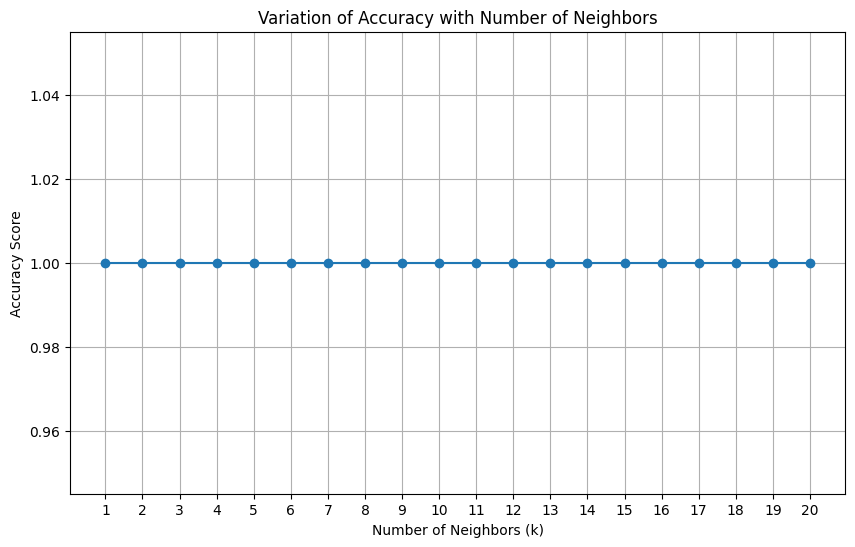

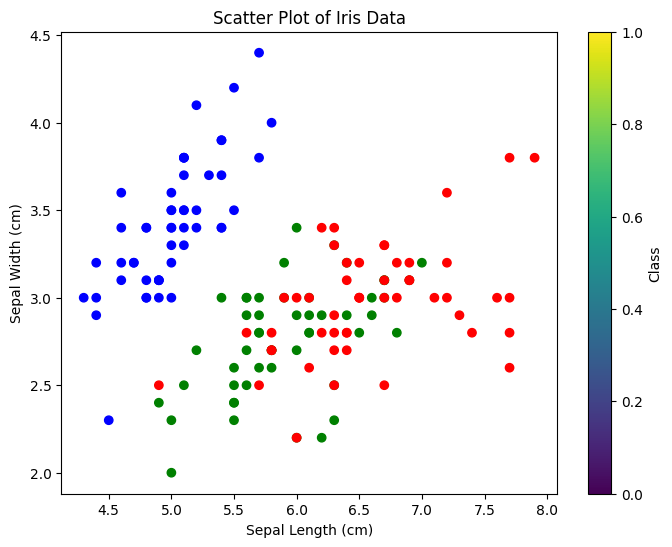

Predicted Class for New Observation: Iris-setosa
Accuracy on Split Test Set: 1.0000
Cross-validated Accuracy (k=10): 0.9667


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [12]:
#Exercice 2
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load Iris dataset from CSV
data = pd.read_csv("iris.csv")

# Separate features and target variable
X = data.drop('class', axis=1)
y = data['class']

# Split the data into training and testing sets (75% train, 25% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Create KNN model with k=3
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Define the score function
def score(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

# Use the score function
accuracy_custom = score(knn, X_test, y_test)
print(f"Accuracy (Custom Function): {accuracy_custom:.4f}")

# Compare with built-in score method
accuracy_builtin = knn.score(X_test, y_test)
print(f"Accuracy (Built-in Method): {accuracy_builtin:.4f}")

# Compare with accuracy_score function
accuracy_sklearn = accuracy_score(y_test, knn.predict(X_test))
print(f"Accuracy (sklearn accuracy_score): {accuracy_sklearn:.4f}")

# Test different values of k
k_values = range(1, 21)
scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))

# Plot the scores
plt.figure(figsize=(10, 6))
plt.plot(k_values, scores, marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy Score')
plt.title('Variation of Accuracy with Number of Neighbors')
plt.xticks(k_values)
plt.grid(True)
plt.show()

# Define colors for each class
class_colors = {'Iris-setosa': 'blue', 'Iris-versicolor': 'green', 'Iris-virginica': 'red'}

# Scatter plot of data points with class labels
plt.figure(figsize=(8, 6))
plt.scatter(data['sepal_length_in_cm'], data['sepal_width_in_cm'], c=data['class'].map(class_colors))
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Scatter Plot of Iris Data')
plt.colorbar(label='Class')
plt.show()

# Add a new observation and classify using KNN
new_observation = [[5.2, 3.1, 1.5, 0.3]]  # Example new observation
knn_new = KNeighborsClassifier(n_neighbors=3)
knn_new.fit(X_train, y_train)
new_observation_class = knn_new.predict(new_observation)
print(f"Predicted Class for New Observation: {new_observation_class[0]}")

# Split data into training (75%) and test (25%) sets using train_test_split
X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(X, y, test_size=0.25, random_state=42)
knn_split = KNeighborsClassifier(n_neighbors=3)
knn_split.fit(X_train_split, y_train_split)
accuracy_split = knn_split.score(X_test_split, y_test_split)
print(f"Accuracy on Split Test Set: {accuracy_split:.4f}")

# Cross-validation with k=10
from sklearn.model_selection import cross_val_score

knn_cv = KNeighborsClassifier(n_neighbors=3)
cv_scores = cross_val_score(knn_cv, X, y, cv=10)
print(f"Cross-validated Accuracy (k=10): {cv_scores.mean():.4f}")
